# Field correlations in Atom-Cavity systems
based on a discussion from QuTiP list, and Rebic et al. PRA **69**, 035804 (2004)

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
# Earlier versions* match qutip list discussion, this has been modified to match PRA 69, 035804
# *see github
N=4  # Note, it works fine to truncate at 4 (as in the paper)

taus=np.linspace(0,10,500)

a=tensor(identity(2), destroy(N))
sm=tensor(sigmam(),identity(N))
sz=tensor(sigmaz(),identity(N))

In [136]:
kappa = 1
g = 6*kappa
theta = g
Ep = 0.1*kappa
gamma = 0.1*kappa

Hint = theta*(0.5*sz + a.dag()*a) + 1j*g*(a.dag()*sm - a*sm.dag())
Hpump = 1j*Ep*(a - a.dag())
H = Hint + Hpump

c_ops = [np.sqrt(kappa)*a, np.sqrt(gamma)*sm]

rho0=tensor(fock_dm(2,0),fock_dm(N,0))

In [137]:
n_op = a.dag()*a
solution = mesolve(H,rho0,taus, c_ops, [n_op])
n = solution.expect[0]

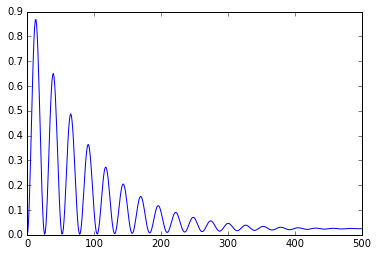

In [138]:
plt.plot(n)

In [139]:
# 1st order correlation:
# pass None as state so it solves for steady state
corr1 = correlation_2op_1t(H, None, taus, c_ops, a.dag(), a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


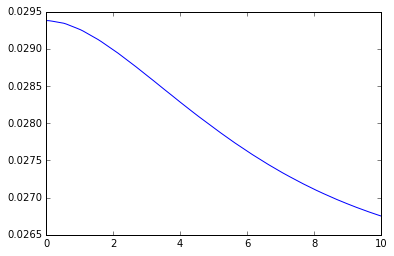

In [140]:
plt.plot(taus,corr1)

In [141]:
# Could also just use this:
g1 = coherence_function_g1(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


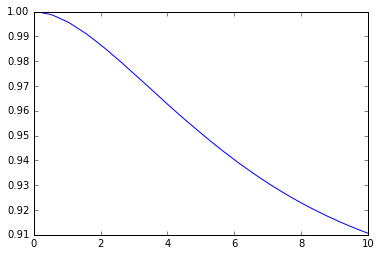

In [142]:
plt.plot(taus,g1)

In [143]:
# 2nd order correlation
# again, pass None so it solves for steady state
corr2 = correlation_3op_1t(H, None, taus, c_ops, a.dag(), a.dag()*a, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


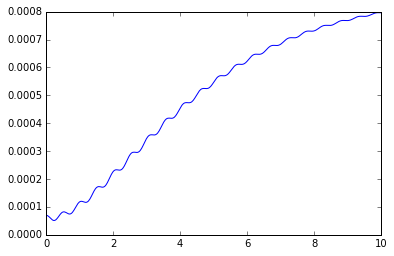

In [144]:
plt.plot(taus,corr2)

In [145]:
# Or just use this:
g2_weak = coherence_function_g2(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


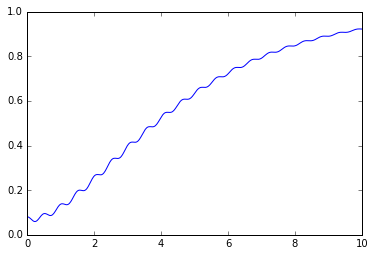

In [146]:
plt.plot(taus,g2_weak)

The two curves they show are for different values of g and pump, try that here:

In [147]:
kappa = 1
g = 20*kappa
theta = g
Ep = 0.5*kappa
gamma = 0.1*kappa

Hint = theta*(0.5*sz + a.dag()*a) + 1j*g*(a.dag()*sm - a*sm.dag())
Hpump = 1j*Ep*(a - a.dag())
H = Hint + Hpump

c_ops = [np.sqrt(kappa)*a, np.sqrt(gamma)*sm]

rho0=tensor(fock_dm(2,0),fock_dm(N,0))

In [148]:
g2_strong = coherence_function_g2(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


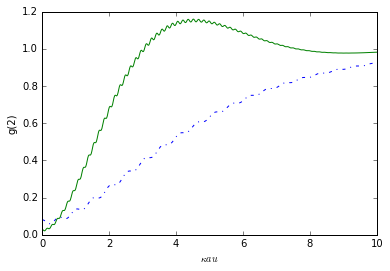

In [149]:
plt.plot(taus,g2_weak,"-.")
plt.plot(taus,g2_strong)
plt.xlabel("$\kappa\tau$")
plt.ylabel("g(2)")

Sweet! Pretty nice agreement here!

In [51]:
qutip.__version__

'3.1.0'

In [54]:
import sys
print(sys.version)

3.5.0 |Anaconda custom (x86_64)| (default, Oct 20 2015, 14:39:26) 
[GCC 4.2.1 (Apple Inc. build 5577)]


Next, look at the other model (EIT Kerr) and compare.

Now for the EIT Kerr approach:

In [208]:
# Define four level system and field:
N=4  # photons to track in the field

a=tensor(identity(4), destroy(N))

one = Qobj([[1],[0],[0],[0]])
one = tensor(one, identity(N))
two = Qobj([[0],[1],[0],[0]])
two = tensor(two, identity(N))
three = Qobj([[0],[0],[1],[0]])
three = tensor(three, identity(N))
four = Qobj([[0],[0],[0],[1]])
four = tensor(four, identity(N))
sig11 = one * one.dag()
sig22 = two * two.dag()
sig33 = three * three.dag()
sig44 = four * four.dag()
sig12 = one * two.dag()
sig13 = one * three.dag()
sig23 = two * three.dag()
sig24 = two * four.dag()

In [232]:


taus=np.linspace(0,10,1000)


kappa = 1
gamma = 0.1*kappa
Delta = 0.0
g1 = 6*kappa
g2 = 6*kappa

# For dashed line:
delta = 0.2*kappa
OmegaC = 6*kappa
Ep = 0.7*kappa

# For solid line:
# delta = 4*kappa
# OmegaC = 12*kappa
# Ep = 0.1*kappa

Hint = delta*sig33 + Delta*sig44 + 1j*(g1*(a.dag()*sig13 - sig13.dag()*a) + OmegaC*(sig23 - sig23.dag()) + g2*(a.dag()*sig24 - sig24.dag()*a))
Hpump = 1j*Ep*(a - a.dag())
H = Hint + Hpump

c_ops = [np.sqrt(kappa)*a,np.sqrt(gamma + gamma)*sig33,np.sqrt(gamma)*sig44] # TODO: check the s33 and s44 decays.

rho0=tensor(fock_dm(4,0),fock_dm(N,0))

In [233]:
n_op = a.dag()*a
exp_ops = [n_op,sig11,sig22,sig33,sig44]
solution = mesolve(H,rho0,taus, c_ops, exp_ops)
n = solution.expect[0]

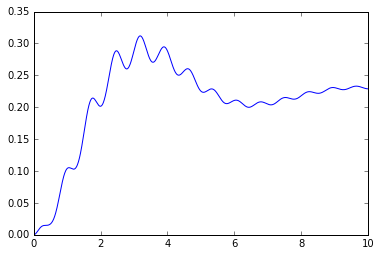

In [234]:
plt.plot(taus,n)

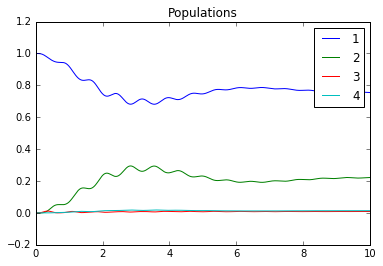

In [235]:
for i,v in enumerate(solution.expect[1:]):
    plt.plot(taus,v,label="{}".format(i+1))
    
plt.ylim(-0.2,1.2)
plt.legend()
plt.title("Populations")

In [236]:
g2_eit = coherence_function_g2(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


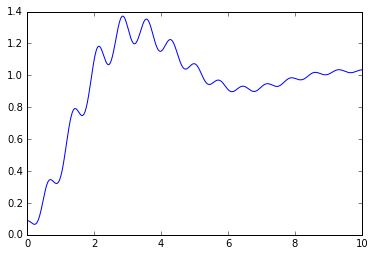

In [237]:
plt.plot(taus,g2_eit)

In [251]:


taus=np.linspace(0,10,1000)


kappa = 1
gamma = 0.1*kappa
Delta = 0.0
g1 = 6*kappa
g2 = 6*kappa

# For dashed line:
# delta = 0.2*kappa
# OmegaC = 6*kappa
# Ep = 0.7*kappa

# For solid line:
delta = 4*kappa
OmegaC = 12*kappa
Ep = 0.1*kappa

Hint = delta*sig33 + Delta*sig44 + 1j*(g1*(a.dag()*sig13 - sig13.dag()*a) + OmegaC*(sig23 - sig23.dag()) + g2*(a.dag()*sig24 - sig24.dag()*a))
Hpump = 1j*Ep*(a - a.dag())
H = Hint + Hpump

c_ops = [np.sqrt(kappa)*a,np.sqrt(gamma + gamma)*sig33,np.sqrt(gamma)*sig44] # TODO: check the s33 and s44 decays.

rho0=tensor(fock_dm(4,0),fock_dm(N,0))

In [252]:
g2_eit_solid = coherence_function_g2(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 1.5)

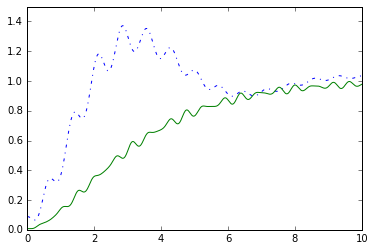

In [253]:
plt.plot(taus,g2_eit,"-.")
plt.plot(taus,g2_eit_solid)
plt.ylim(0,1.5)

Once again, great agreement here!